# Micro Credit Defaulter Project

#### Problem Statement

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

NOTE: Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.


In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_mc = pd.read_csv("Data file.csv") #Reading csv file
df_mc

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


Above is my dataset and the label is my target column. I have to predict the probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of loan insurance. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been paid i.e. defaulter. So clearly it's a **Classification problem**.

### Features information:

- label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}
- msisdn : mobile number of user
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 : Number of times main account got recharged in last 30 days
- fr_ma_rech30 : Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 : Number of times main account got recharged in last 90 days
- fr_ma_rech90 : Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 : Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90 : Number of times data account got recharged in last 90 days
- fr_da_rech90 : Frequency of data account recharged in last 90 days
- cnt_loans30 : Number of loans taken by user in last 30 days
- amnt_loans30: Total amount of loans taken by user in last 30 days
- maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 : Number of loans taken by user in last 90 days
- amnt_loans90 : Total amount of loans taken by user in last 90 days
- maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
- payback30 : Average payback time in days over last 30 days
- payback90 : Average payback time in days over last 90 days
- pcircle : telecom circle
- pdate : date

In [3]:
# First 10 rows
df_mc.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [4]:
# Last 10 rows
df_mc.tail(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209583,209584,1,30201I82732,935.0,15.550667,15.550667,140.44,140.44,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,UPW,2016-06-02
209584,209585,0,70387I89237,945.0,0.000000,0.000000,78.30,78.30,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,UPW,2016-06-06
209585,209586,1,12227I90843,793.0,5350.315333,5356.210000,594.80,640.20,2.0,0.0,...,6.0,0.0,5.0,30,6,0.0,5.2,5.200000,UPW,2016-07-04
209586,209587,1,60331I70370,254.0,20079.157333,20228.090000,4003.12,5173.74,2.0,0.0,...,12.0,0.0,15.0,120,12,0.0,3.0,2.400000,UPW,2016-07-22
209587,209588,1,19900I95200,239.0,14678.000000,14704.900000,12935.26,16775.60,8.0,0.0,...,12.0,1.0,3.0,24,12,1.0,0.0,30.000000,UPW,2016-08-02
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
# Sample
df_mc.sample(4)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
15845,15846,1,08147I85339,108.0,97.898667,97.898667,336.96,336.96,15.0,0.0,...,6.0,0.0,3.0,18,6,0.0,3.333333,3.333333,UPW,2016-06-26
171676,171677,1,34551I70780,550.0,83.125333,83.125333,346.88,346.88,3.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-16
183586,183587,1,17311I84458,966.0,2458.872000,2471.160000,919.03,1029.63,3.0,0.0,...,6.0,0.0,7.0,42,6,0.0,4.333333,4.571429,UPW,2016-07-04
7991,7992,1,03645I70786,160.0,60.310000,60.310000,1308.00,1308.00,3.0,0.0,...,6.0,0.0,3.0,18,6,0.0,9.666667,9.666667,UPW,2016-06-30


# Preprocessing & EDA

In [6]:
#Checking shape of dataset
df_mc.shape

(209593, 37)

There are 209593 rows and 37 columns in the dataset.

In [7]:
# Checking all column names
df_mc.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
# Checking the data types of all columns
df_mc.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

We have all 3 types of data in dataset they are integer, float and object. " pdate " should be a datetime datatype so we have to change it from object to datetime datatype.

In [9]:
# Checking the info about the dataset
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [10]:
# Checking unique values of each column
df_mc.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

" Unnamed:0 " is a index column in raw dataset so we can drop it.  
" pcircle " has only one entry, so it will have no contribution with our model training so we can drop this column also.  
" msisdn " is a column with phone numbers of users so this column has no contribution towards model building.

In [11]:
# Dropping unnecessary columns
df_mc = df_mc.drop(["Unnamed: 0"],axis=1)
df_mc = df_mc.drop(["pcircle"],axis=1)
df_mc = df_mc.drop(["msisdn"],axis=1)

In [12]:
# Checking null values in the dataset
df_mc.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

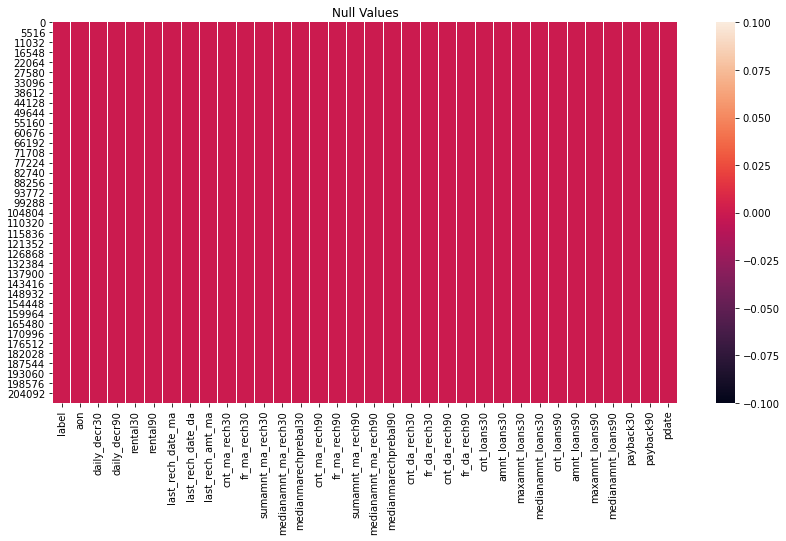

In [13]:
# Visualizing null values
plt.figure(figsize=[14,7])
sns.heatmap(df_mc.isnull())
plt.title("Null Values")
plt.show()

No null values present in the dataset.

In [14]:
# Checking unique values of target column
df_mc['label'].unique()

array([0, 1], dtype=int64)

There is only two unique values in target column, so its a binary classification problem.

In [15]:
# Checking for empty observations
df_mc.loc[df_mc['label'] == " "]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate


No empty observations in our target column.

# Feature Extraction

In [16]:
# Converting object data type to datetime 
df_mc['pdate'] =  pd.to_datetime(df_mc['pdate'])

In [17]:
# Extracting paid year,month and day from pdate

# Extracting year
df_mc["pyear"]=pd.to_datetime(df_mc.pdate, format="%d/%m/%Y").dt.year

# Extracting month
df_mc["pmonth"]=pd.to_datetime(df_mc.pdate, format="%d/%m/%Y").dt.month

# Extracting day
df_mc["pday"]=pd.to_datetime(df_mc.pdate, format="%d/%m/%Y").dt.day

In [18]:
# Dropping pdate column after extraction
df_mc = df_mc.drop(["pdate"],axis=1)

We have successfully extracted day, month and year from pdate column.

In [19]:
# Checking the value counts of pyear column
df_mc.pyear.value_counts()

2016    209593
Name: pyear, dtype: int64

So in pyear column all the entries are of year 2016, keeping all these entries will not help in our model training so let's drop it.

In [20]:
# Dropping pyear column
df_mc = df_mc.drop(["pyear"],axis=1)

In [21]:
df_mc.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pmonth', 'pday'],
      dtype='object')

In [22]:
# Checking the value counts of last_rech_date_da column
df_mc.last_rech_date_da.value_counts()

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
972043.927177         1
730467.685964         1
648250.135477         1
967450.808384         1
617088.100524         1
Name: last_rech_date_da, Length: 1174, dtype: int64

There are more than 95 % zero values in this column.

In [23]:
# Checking the value counts of cnt_da_rech30 column
df_mc.cnt_da_rech30.value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
93269.252586         1
96114.327371         1
66873.919289         1
47553.483667         1
30176.182534         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

There are 98 % zero values in this column.

In [24]:
# Checking the value counts of fr_da_rech30 column
df_mc.fr_da_rech30.value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
625056.376797         1
568310.256116         1
740448.593977         1
720950.084971         1
978390.348610         1
Name: fr_da_rech30, Length: 1072, dtype: int64

There are 98 % zero values in this column.

In [25]:
# Checking the value counts of cnt_da_rech90 column
df_mc.cnt_da_rech90.value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
11         7
12         7
13         6
10         6
16         4
18         3
15         2
17         1
19         1
20         1
22         1
25         1
27         1
28         1
30         1
38         1
Name: cnt_da_rech90, dtype: int64

There are 97 % zero values in this column.

In [26]:
# Checking the value counts of fr_da_rech90 column
df_mc.fr_da_rech90.value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
17        14
16        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
33         1
39         1
42         1
43         1
46         1
55         1
56         1
64         1
Name: fr_da_rech90, dtype: int64

This column has almost 98 % zero values.

In [27]:
# Checking the value counts of medianamnt_loans30 column
df_mc.medianamnt_loans30.value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

There are more than 90 % zero values in this column.

In [28]:
# Checking the value counts of medianamnt_loans90 column
df_mc.medianamnt_loans90.value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

There are 94 % zero values present in this column.

In all the above columns i found more than 90 % zeros so they will create skewness in our dataset. So we have to drop these columns. 

In [29]:
# Dropping columns with more than 90 % zeros
df_mc.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [30]:
# Checking description of the dataset
df_mc.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,...,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,...,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


We can observe negative values in some columns : aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, medianmarechprebal30, medianmarechprebal90.
    
The above columns can not be negative as they are age, account balance and number of days. So we will change them to positive.

In [31]:
# Converting all negative values to positive values in above columns
df_mc['aon']=abs(df_mc['aon'])
df_mc['daily_decr30']=abs(df_mc['daily_decr30'])
df_mc['daily_decr90']=abs(df_mc['daily_decr90'])
df_mc['rental30']=abs(df_mc['rental30'])
df_mc['rental90']=abs(df_mc['rental90'])
df_mc['last_rech_date_ma']=abs(df_mc['last_rech_date_ma'])
df_mc['medianmarechprebal30']=abs(df_mc['medianmarechprebal30'])
df_mc['medianmarechprebal90']=abs(df_mc['medianmarechprebal90'])

In [32]:
# Checking if there are other entries in maxamnt_loans30 column except 0,6,12 
df_mc.loc[(df_mc['maxamnt_loans30'] != 6.0) & (df_mc['maxamnt_loans30'] != 12.0) & (df_mc['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

Converting all the above values to zero as it is specified in the problem statement we can have only 0,6,12 as maximum amount of loan taken by the user in last 30 days.

In [33]:
# Converting the above values into zero
df_mc.loc[(df_mc['maxamnt_loans30'] != 6.0) & (df_mc['maxamnt_loans30'] != 12.0) & (df_mc['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [34]:
# Valuecount of maxamnt_loans30 column agian
df_mc.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [35]:
# Dropping the people who haven't taken any loan
df_mc.drop(df_mc[df_mc['amnt_loans90']==0].index, inplace = True)

In [36]:
# Checking description of the dataset
df_mc.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,...,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,8095.625616,5352.453575,6044.996776,2697.321812,3477.845090,3744.568567,2057.044751,3.991477,3728.164201,...,2.786138,18.128730,6.689790,18.610723,23.878150,6.769116,3.421201,4.350039,6.787560,14.429159
std,0.331908,75605.518933,9208.677568,10902.799534,4258.460653,5698.968928,53813.257533,2363.829442,4.264318,53603.753070,...,2.552263,17.373116,2.107794,225.235874,26.495145,2.005785,8.796510,10.294639,0.737225,8.421331
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.760000,41.983500,299.690000,326.340000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.800000,4.500000,7.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.000000


# Data Visualization

### Univariate Analysis

In [37]:
# Checking for categorical columns
categorical_columns=[]
for i in df_mc.dtypes.index:
    if df_mc.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


No categoricals columns present in the dataset.

In [38]:
# Checking for numerical columns
numerical_columns=[]
for i in df_mc.dtypes.index:
    if df_mc.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


In [39]:
columns=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

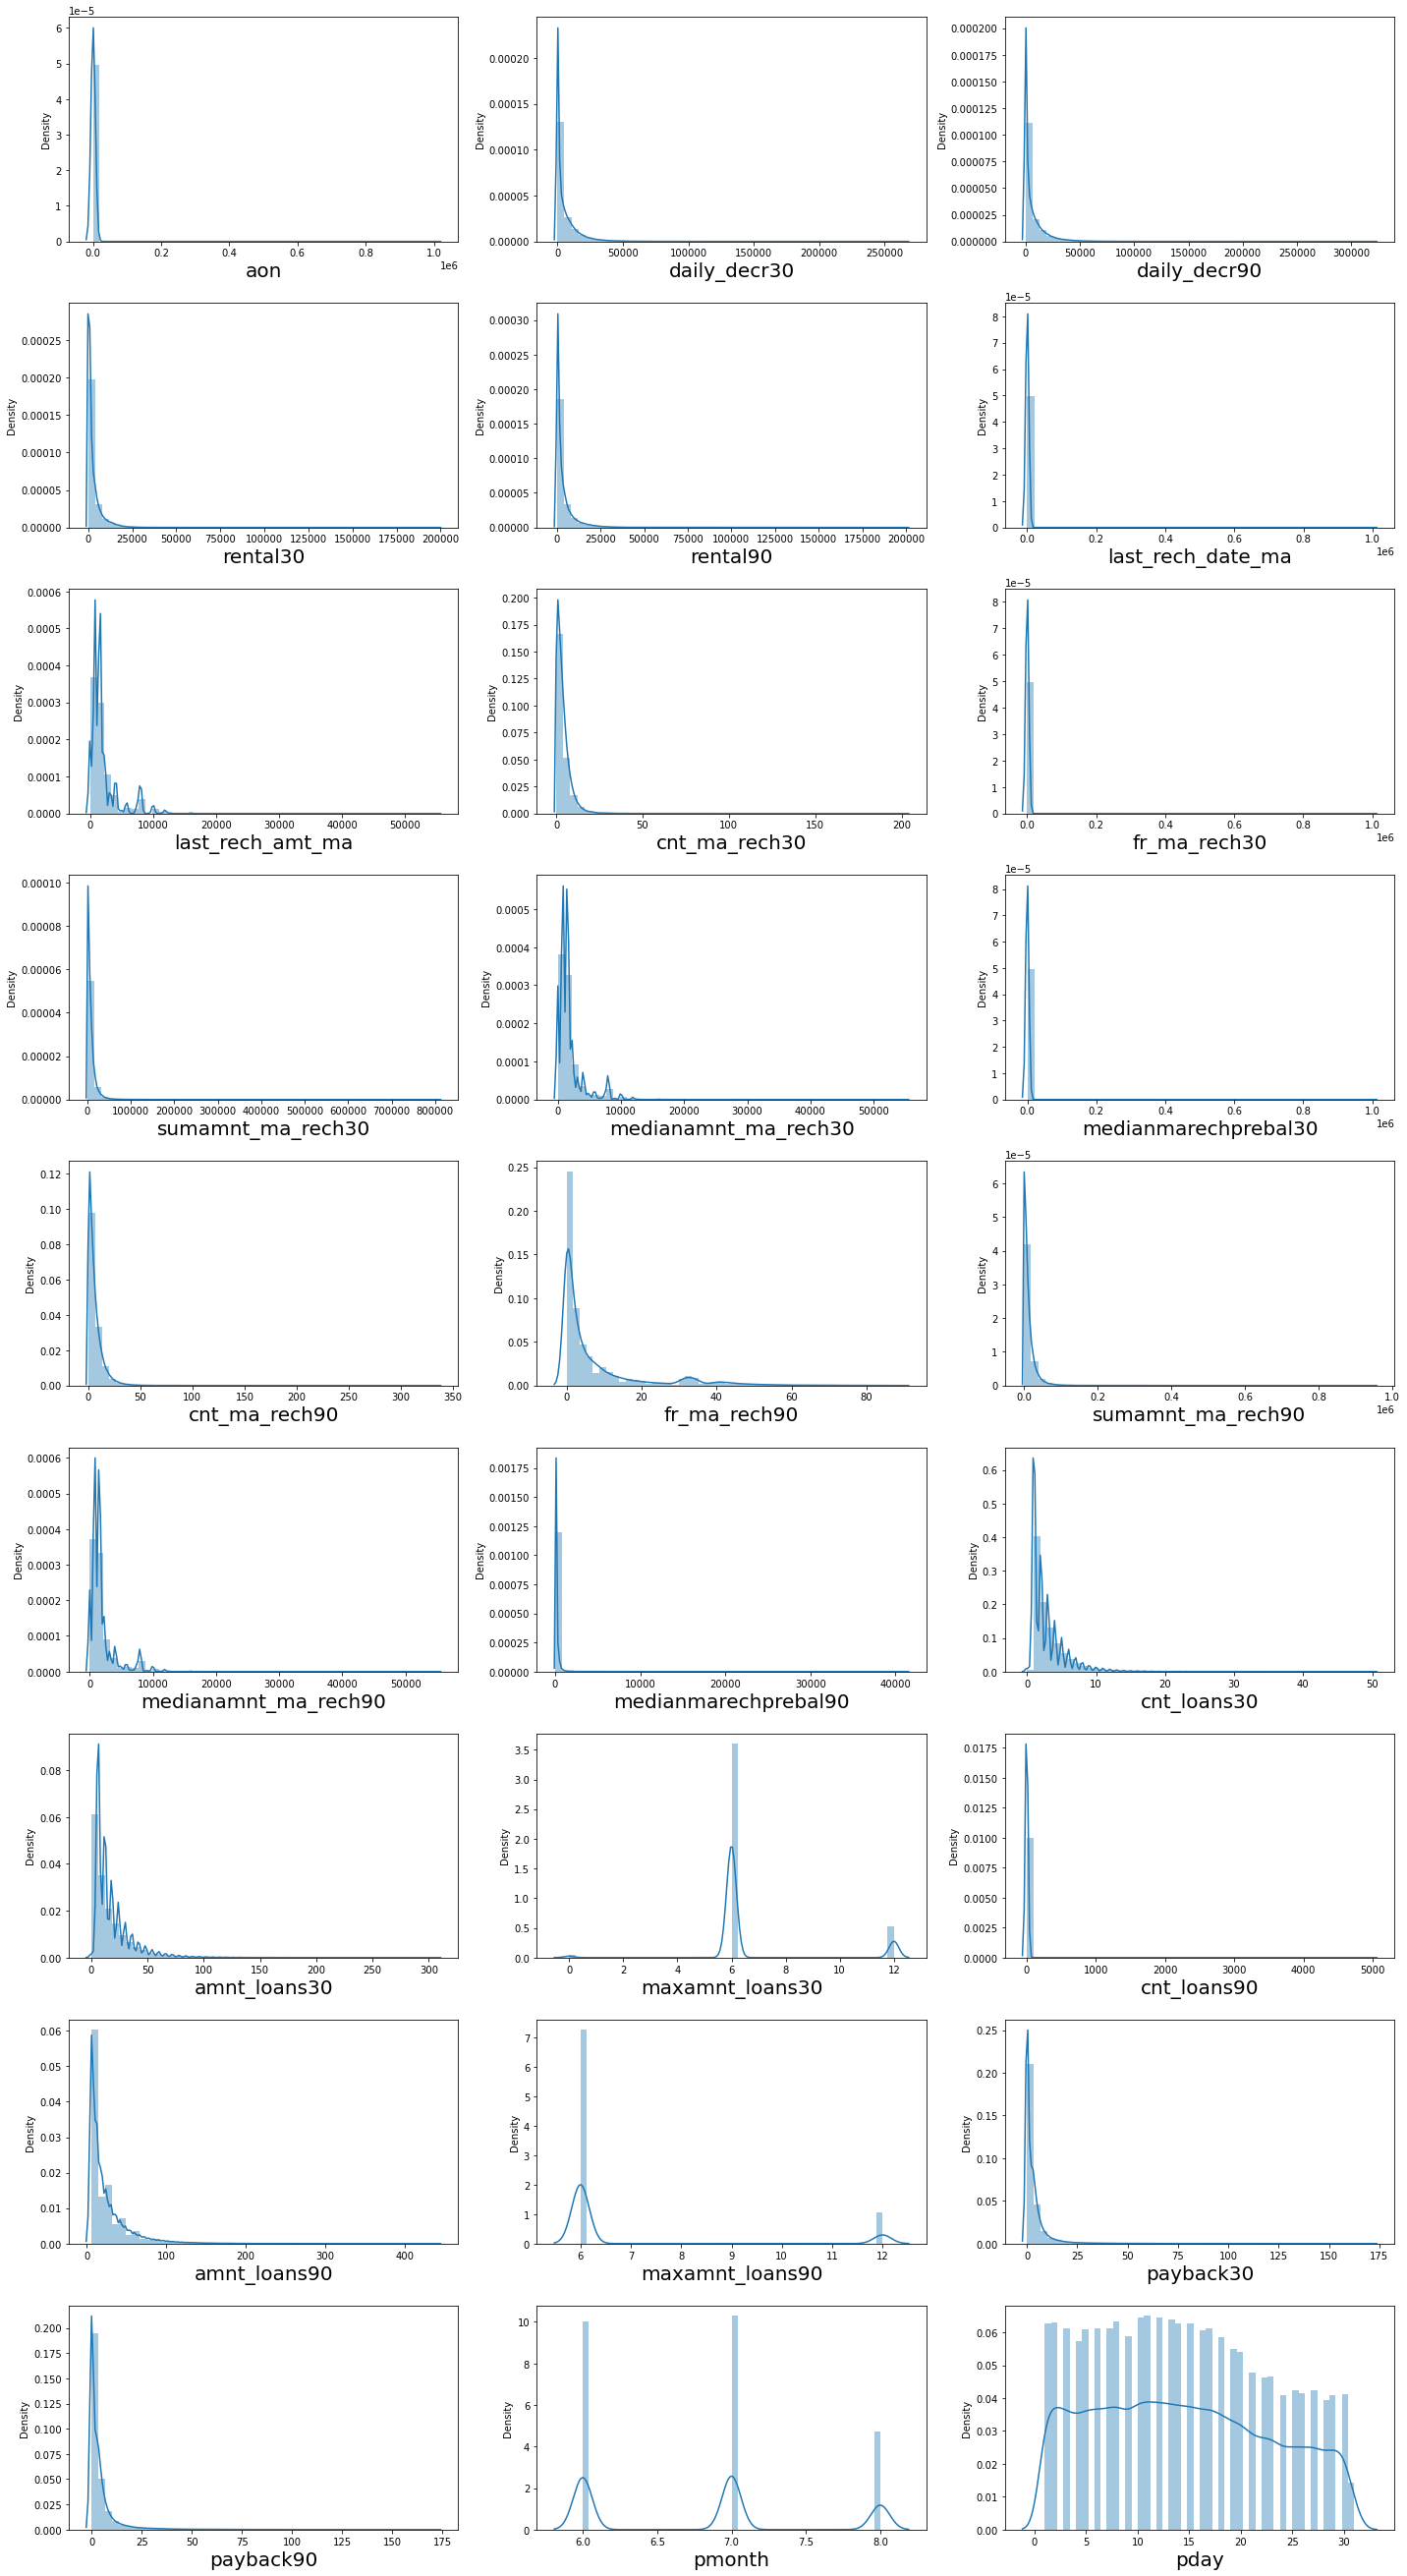

In [40]:
# Distribution plot for all numerical columns except label
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df_mc[columns]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df_mc[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

We can see skewness present in most of the columns above, we will have to treat skewness before model building.

<AxesSubplot:xlabel='label', ylabel='count'>

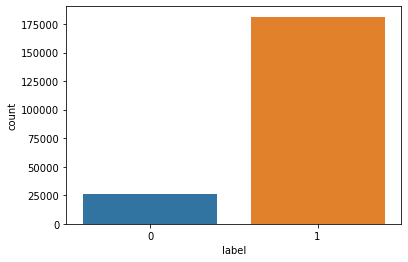

In [41]:
# Countplot for target column
sns.countplot(df_mc['label'])

We can see there is a problem of data imbalance, which we will have to treat through oversampling or undersampling.

### Bivariate Analysis

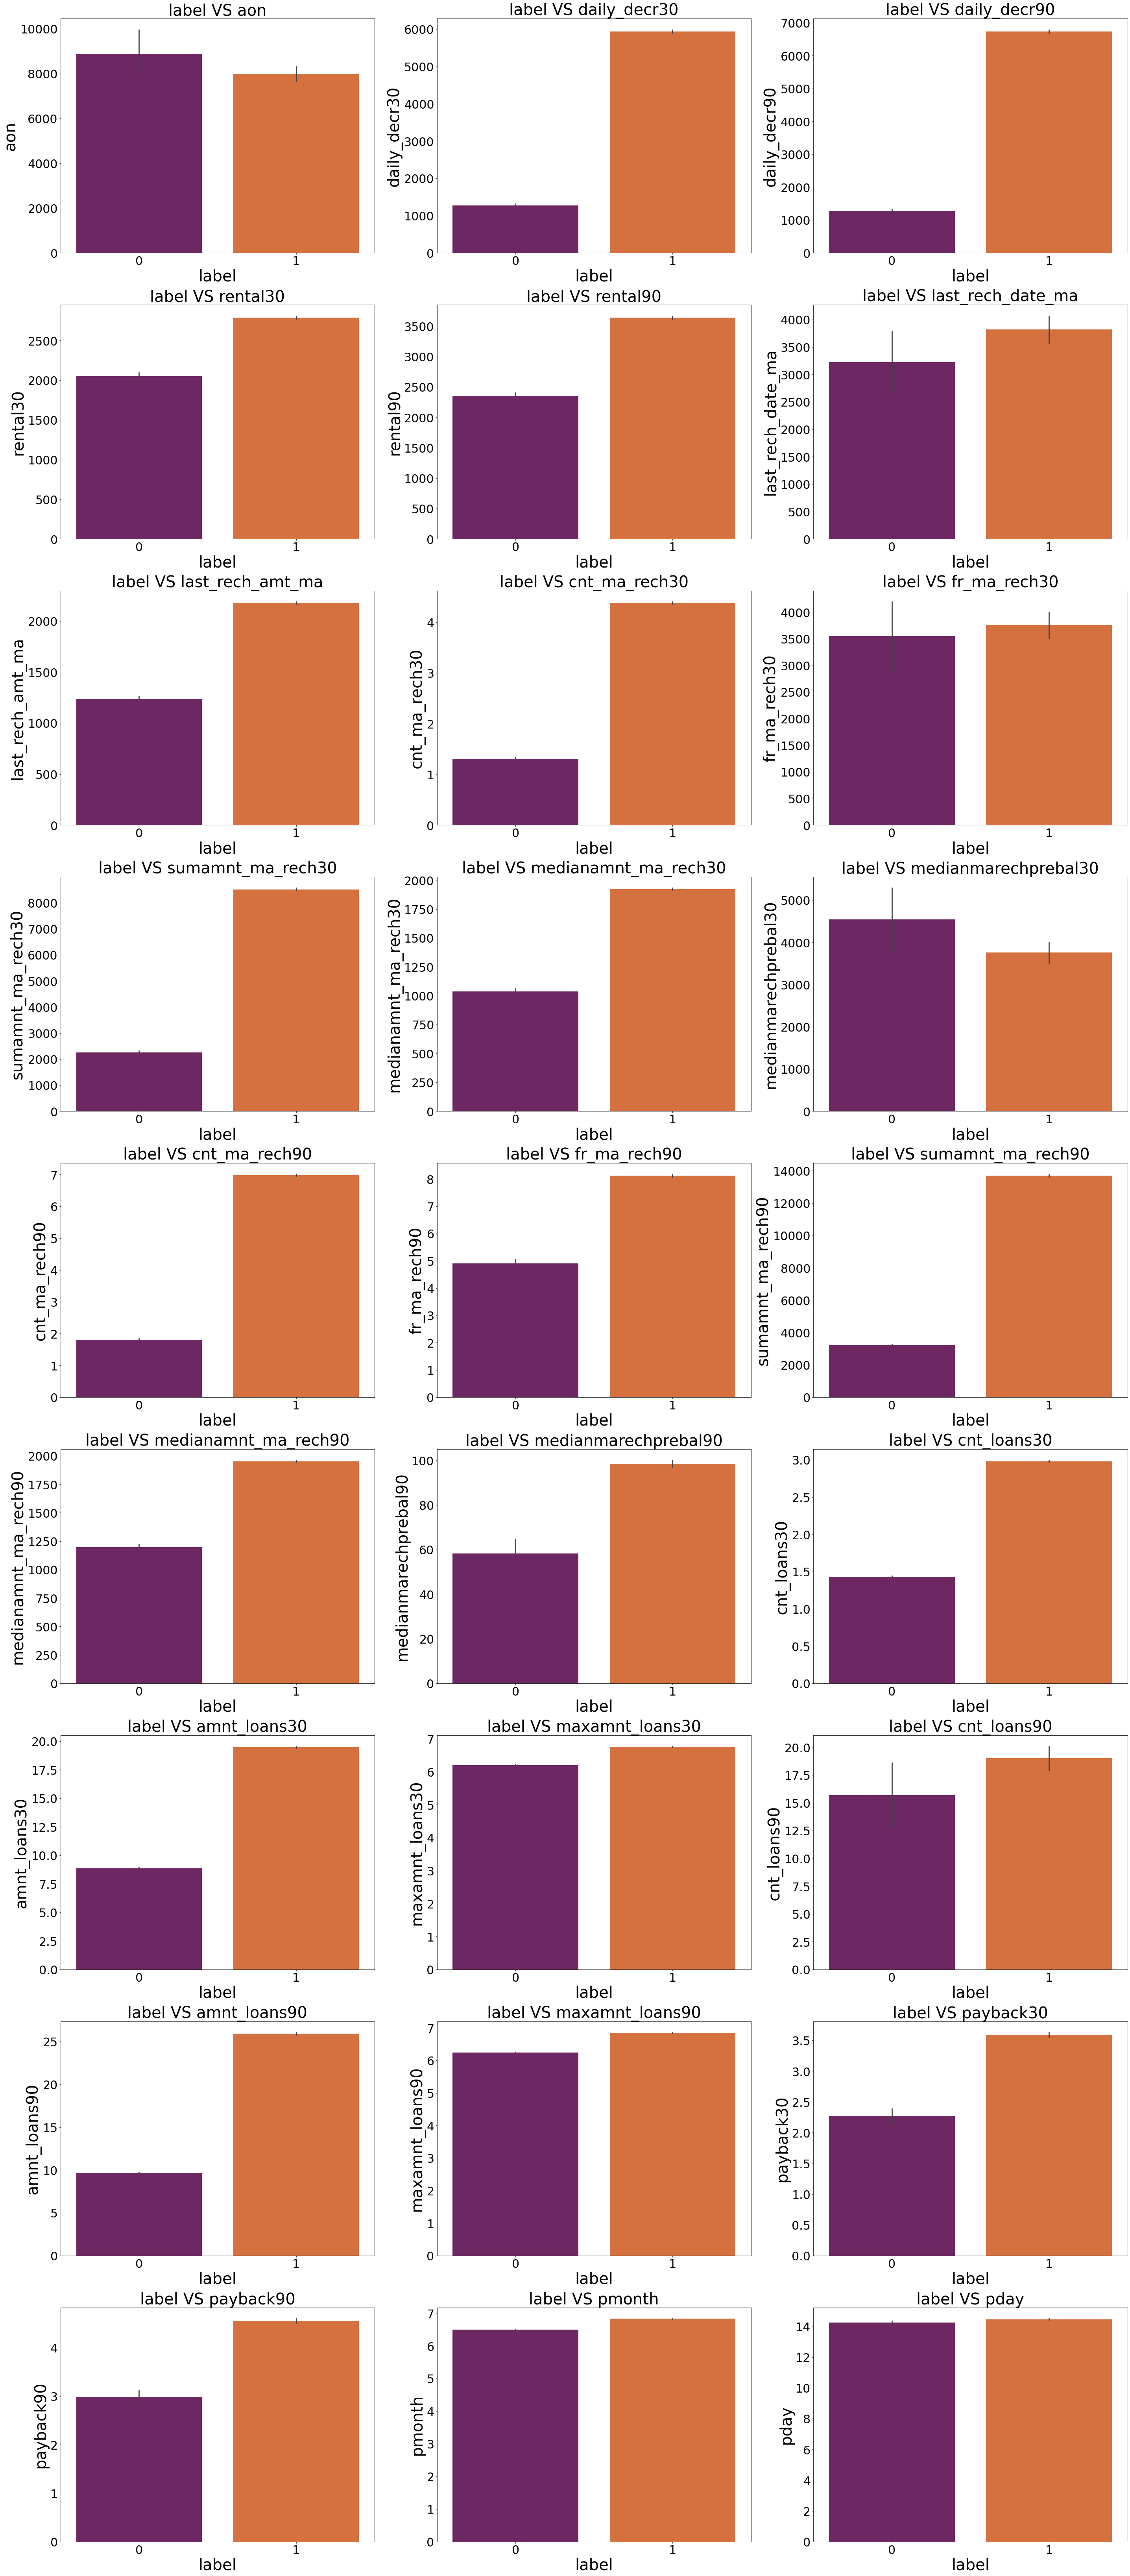

In [42]:
# Barplot for numerical columns
plt.figure(figsize=(40,100))
for i in range(len(columns)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df_mc['label'], y=df_mc[columns[i]], palette="inferno")
    plt.title(f"label VS {columns[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(columns[i],fontsize = 40)
    plt.tight_layout()

**OBSERVATIONS:**
- 1. Customers with high value of Age on cellular network in days(aon) are maximum defaulters (who have not paid their loan amount-0).
- 2. Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid their loan amount-1).
- 3. Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters (who have paid their loan amount-1).
- 4. Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid their loan amount-1).
- 5. Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid their loan amount-1).
- 6. Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid their loan amount-1).
- 7. Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid their loan amount-1).
- 8. Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid their loan amount-1).
- 9. Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid their loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.
- 10. Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid their loan amount-1).
- 11. Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid their loan amount-1).
- 12. Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid their loan amount-0).
- 13. Customers with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid their loan amount-1).
- 14. Customers with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid their loan amount-1).
- 15. Customers with high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid their loan amount-1).
- 16. Customers with high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid their loan amount-1).
- 17. Customers with high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid their loan amount-1).
- 18. Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid their loan amount-1).
- 19. Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid their loan amount-1).
- 20. Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid their loan amount-1).
- 21. Customers with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid their loan amount-1).
- 22. Customers with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid their loan amount-1).
- 23. Customers with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid their loan amount-1).
- 24. Customers with high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid their loan amount-1).
- 25. Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid their loan amount-1).
- 26. In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid their loan amount.
- 27. By the 14th of each month all the customers have paid their loan amount.

# Data Cleaning

### Checking Outliers

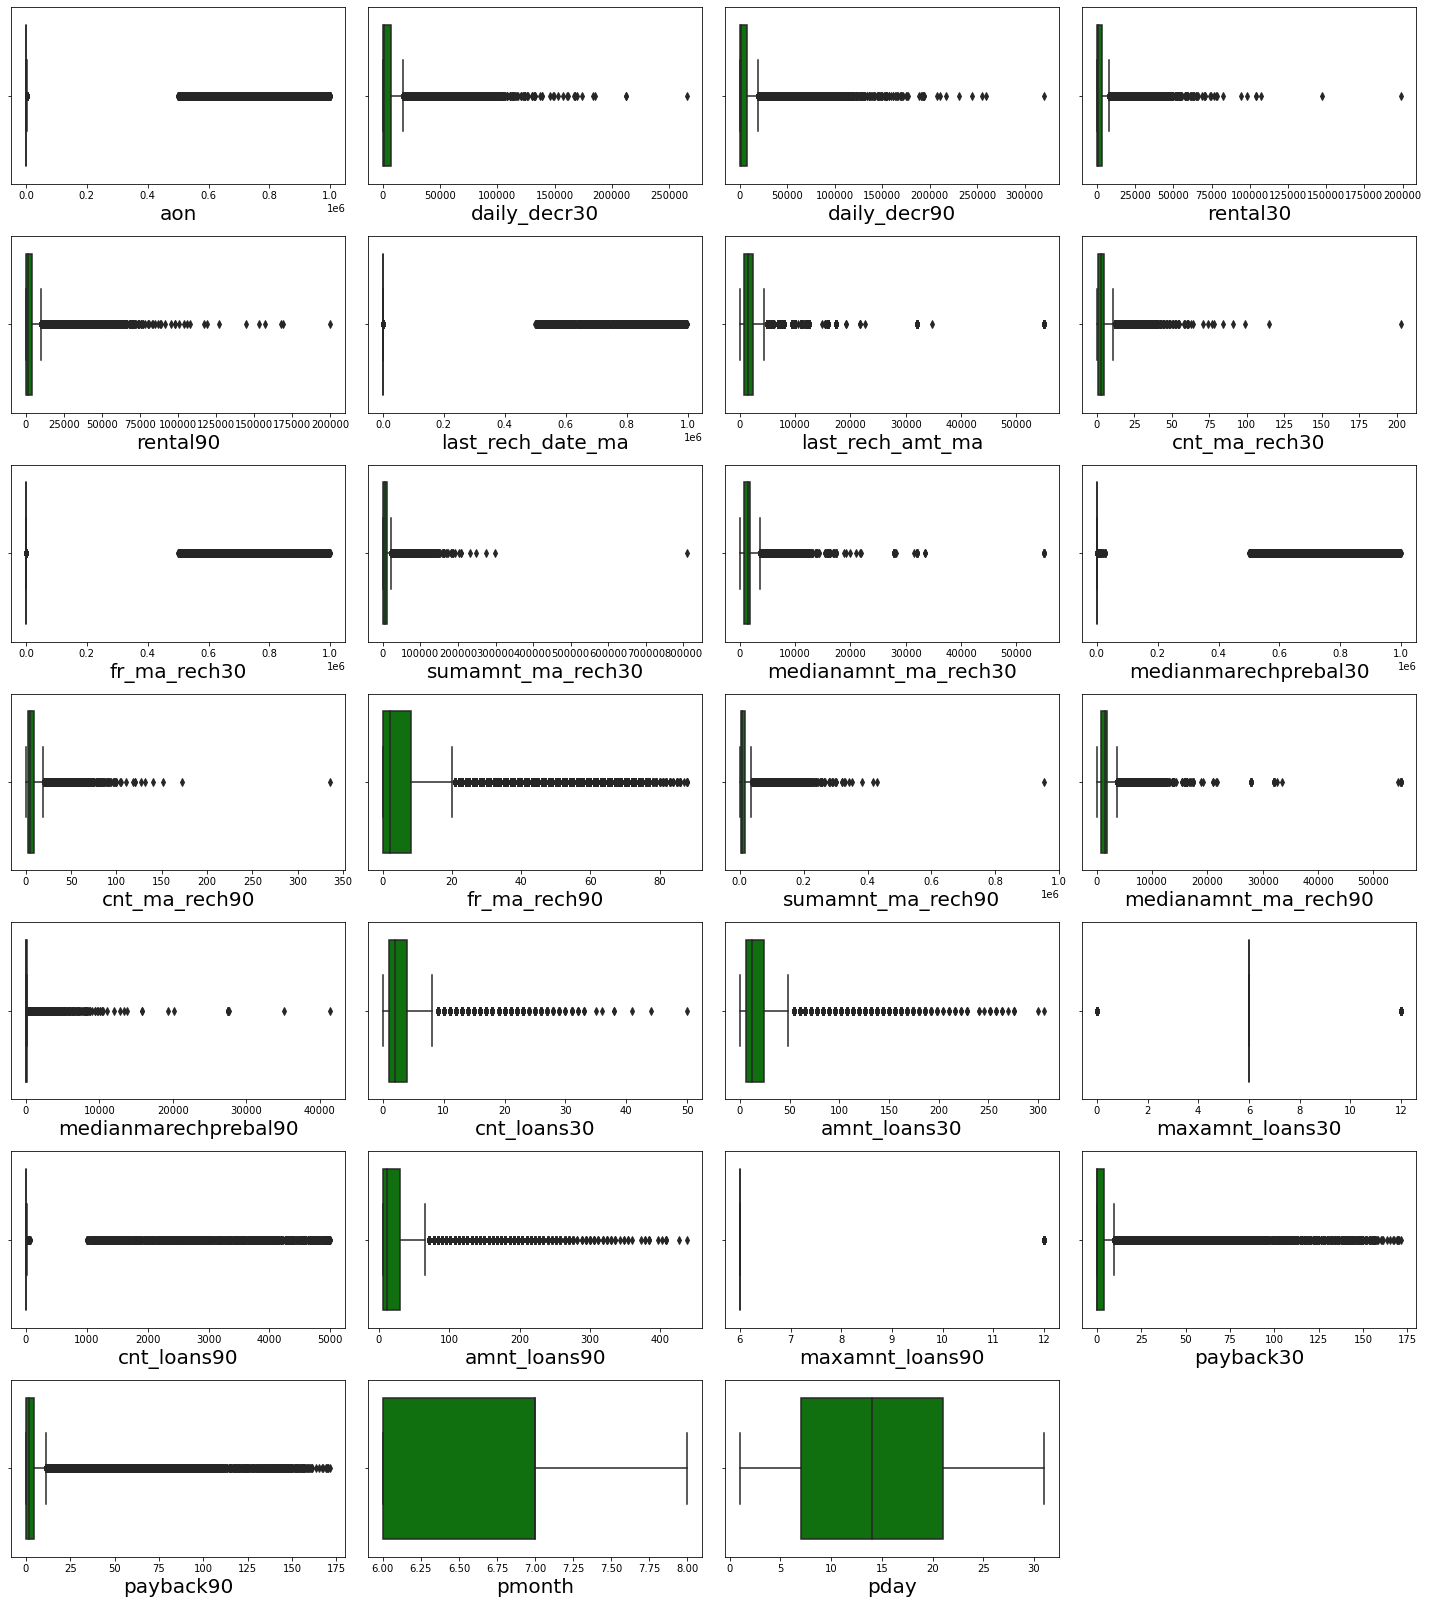

In [43]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df_mc[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in all the columns except pmonth and pday.

### Removing Outliers

#### i) Z-Score Method

In [44]:
# Features having outliers 
outliers = df_mc[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(outliers))
df_new=df_mc[(z<3).all(axis=1)]
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22


In [46]:
# Checking shape of new dataset
df_new.shape

(170071, 28)

In [47]:
# Checking shape of old dataset
df_mc.shape

(207550, 28)

In [48]:
# Checking Dataloss
Dataloss = (((207550-170071)/207550)*100)
Dataloss

18.05781739339918

In Z-score method the data loss is more than 10 % so let me have a look into IQR method to remove outliers.

#### ii) IQR Method

In [49]:
# 1st quantile
Q1=outliers.quantile(0.25)

# 3rd quantile
Q3=outliers.quantile(0.75)

# IQR
IQR = Q3 - Q1

df_IQR=df_mc[~((df_mc < (Q1 - 1.5 * IQR)) |(df_mc > (Q3 + 1.5 * IQR))).any(axis=1)]

In [50]:
# Checking shape of new dataset
df_IQR.shape

(78654, 28)

In [51]:
# Checking shape of old dataset
df_mc.shape

(207550, 28)

In [52]:
# Checking dataloss
Dataloss = (((207550-78654)/207550)*100)
Dataloss

62.103589496506864

In IQR method the data loss is way more than 10 %, so let me have a look into percentile method to remove outliers.

#### iii) Percentile Method

In [53]:
# Removing outliers using percentile method
for col in outliers:
    if df_mc[col].dtypes != 'object':
        percentile = df_mc[col].quantile([0.01,0.98]).values
        df_mc[col][df_mc[col]<=percentile[0]]=percentile[0]
        df_mc[col][df_mc[col]>=percentile[1]]=percentile[1]

We have successfully removed outliers in the dataset using percentile method.

### Checking Skewness

In [54]:
# Checking for skewness in the dataset
df_mc.skew()

label                  -2.253346
aon                     0.934791
daily_decr30            1.978547
daily_decr90            2.098290
rental30                2.117210
rental90                2.205817
last_rech_date_ma       2.565623
last_rech_amt_ma        2.016661
cnt_ma_rech30           1.410702
fr_ma_rech30            1.703431
sumamnt_ma_rech30       1.749207
medianamnt_ma_rech30    2.122065
medianmarechprebal30    2.799234
cnt_ma_rech90           1.566573
fr_ma_rech90            1.987801
sumamnt_ma_rech90       1.863681
medianamnt_ma_rech90    2.143777
medianmarechprebal90    2.631175
cnt_loans30             1.597669
amnt_loans30            1.752260
maxamnt_loans30         1.634976
cnt_loans90             2.000454
amnt_loans90            1.910837
maxamnt_loans90         2.224471
payback30               2.635055
payback90               2.826565
pmonth                  0.358219
pday                    0.184762
dtype: float64

There is skewness in almost all columns except pmonth, pday. And as label is our target we should not remove skewness from this column.

### Removing skewness using yeo-johnson method

In [55]:
# Skewed features
skew=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

In [56]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [57]:
df_mc[skew] = scaler.fit_transform(df_mc[skew].values)

In [58]:
# Checking skewness again
df_mc[skew].skew()

aon                    -0.059261
daily_decr30           -0.137650
daily_decr90           -0.127335
rental30               -0.062522
rental90               -0.062946
last_rech_date_ma       0.043916
last_rech_amt_ma       -0.106643
cnt_ma_rech30          -0.010536
fr_ma_rech30            0.131926
sumamnt_ma_rech30      -0.369147
medianamnt_ma_rech30   -0.237104
medianmarechprebal30   -0.046085
cnt_ma_rech90          -0.012334
fr_ma_rech90            0.141522
sumamnt_ma_rech90      -0.266852
medianamnt_ma_rech90   -0.101431
medianmarechprebal90   -0.029793
cnt_loans30             0.219771
amnt_loans30            0.146844
maxamnt_loans30         0.381337
cnt_loans90             0.201541
amnt_loans90            0.129122
maxamnt_loans90         0.000000
payback30               0.278283
payback90               0.193524
dtype: float64

Skewness is reduced in all the columns.

# Correlation

In [59]:
df_mc.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
label,1.000000,0.097208,0.266444,0.268775,0.142205,0.155661,0.064305,0.262083,0.347162,0.243564,...,0.276082,0.291492,0.075952,0.293548,0.309039,0.101247,0.236554,0.244596,0.151680,0.008241
aon,0.097208,1.000000,0.117096,0.117840,0.084111,0.092045,0.062278,0.097625,0.038139,0.070579,...,0.081993,0.087453,0.028230,0.116259,0.118862,0.038690,0.080812,0.111218,0.088821,0.016277
daily_decr30,0.266444,0.117096,1.000000,0.998435,0.585638,0.641529,0.123072,0.375006,0.498882,0.297504,...,0.398639,0.469091,0.329454,0.530528,0.585352,0.406822,0.336835,0.413587,0.819261,-0.005543
daily_decr90,0.268775,0.117840,0.998435,1.000000,0.586036,0.646414,0.126662,0.374533,0.494780,0.296841,...,0.394111,0.465628,0.329547,0.532191,0.587372,0.409956,0.334597,0.414701,0.832069,-0.012356
rental30,0.142205,0.084111,0.585638,0.586036,1.000000,0.974866,0.055640,0.284950,0.457289,0.248717,...,0.351445,0.391547,0.229190,0.426924,0.457818,0.279351,0.313625,0.349548,0.420241,0.104843
rental90,0.155661,0.092045,0.641529,0.646414,0.974866,1.000000,0.086931,0.294793,0.450131,0.251783,...,0.344863,0.391728,0.243832,0.447225,0.482003,0.306454,0.311970,0.368359,0.505436,0.088389
last_rech_date_ma,0.064305,0.062278,0.123072,0.126662,0.055640,0.086931,1.000000,0.518141,-0.016311,0.062349,...,-0.076541,-0.067983,-0.004410,-0.027212,-0.022283,0.016073,-0.094731,-0.020555,0.070518,0.032959
last_rech_amt_ma,0.262083,0.097625,0.375006,0.374533,0.284950,0.294793,0.518141,1.000000,0.324761,0.274736,...,0.184620,0.221013,0.147657,0.216948,0.246442,0.185654,0.147133,0.184311,0.152274,0.060133
cnt_ma_rech30,0.347162,0.038139,0.498882,0.494780,0.457289,0.450131,-0.016311,0.324761,1.000000,0.416578,...,0.732750,0.738661,0.176343,0.710656,0.723829,0.194797,0.546307,0.488019,0.199803,0.097776
fr_ma_rech30,0.243564,0.070579,0.297504,0.296841,0.248717,0.251783,0.062349,0.274736,0.416578,1.000000,...,0.339864,0.349147,0.090392,0.351095,0.362987,0.102128,0.415946,0.394390,0.135763,0.081552


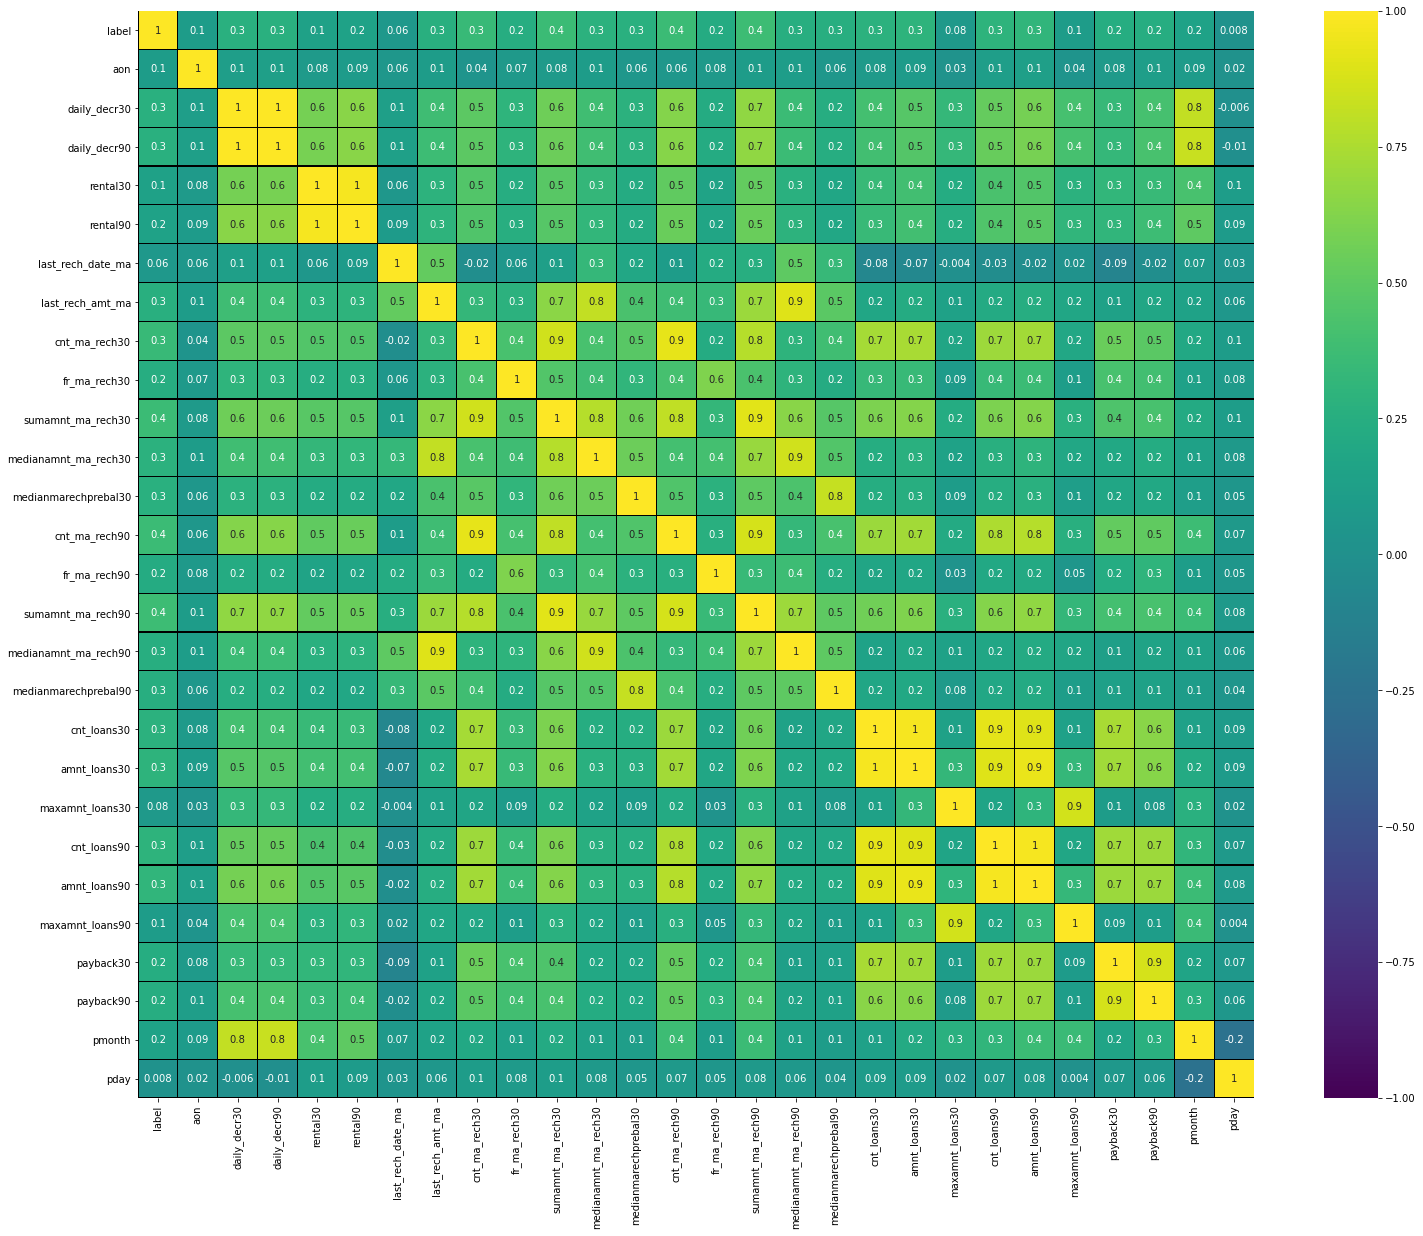

In [60]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df_mc.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="viridis")
plt.yticks(rotation=0);

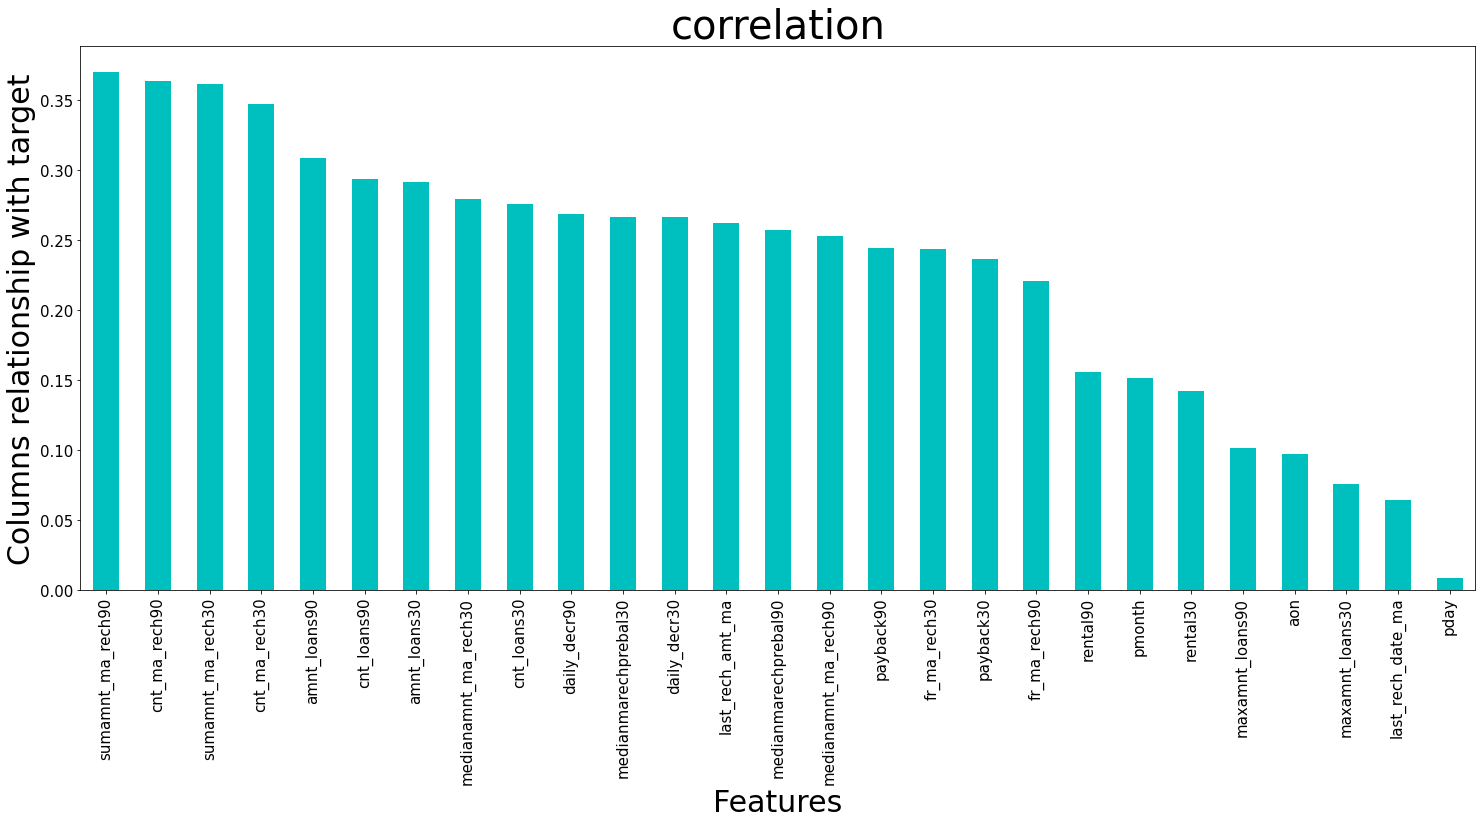

In [61]:
plt.figure(figsize=(25,10))
df_mc.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=30)
plt.ylabel('Columns relationship with target',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

All the features have high correlationwith the target, except pday. We can drop this column if needed.

# Model Building

In [62]:
x = df_mc.drop("label",axis=1)
y = df_mc["label"]

In [63]:
x.shape

(207550, 27)

In [64]:
y.shape

(207550,)

# Scaling

In [65]:
# Scaling the data using MinMax scaler.
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0.348970,0.670388,0.661447,0.330465,0.335513,0.378383,0.498865,0.368297,0.990879,0.435328,...,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,1.000000,0.984592,0.5,0.633333
1,0.625204,0.851665,0.834288,0.706042,0.668524,0.865622,0.831756,0.229617,0.000000,0.540837,...,0.000000,0.378664,1.000000,0.000000,0.321358,1.0,0.000000,0.000000,1.0,0.300000
2,0.537141,0.578404,0.572448,0.491889,0.470866,0.463708,0.498865,0.229617,0.000000,0.341592,...,0.000000,0.000000,0.633603,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.600000
3,0.318099,0.196647,0.198199,0.299475,0.290305,0.995905,0.411921,0.000000,0.000000,0.000000,...,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,0.000000,0.000000,0.0,0.166667
4,0.718606,0.353656,0.353543,0.518649,0.495734,0.526388,0.584318,0.717633,0.448169,0.822222,...,0.910035,0.859875,0.633603,0.784192,0.767230,0.0,0.574148,0.497077,0.0,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207545,0.455692,0.354398,0.354271,0.517436,0.494608,0.248909,0.725540,0.468699,0.448169,0.659938,...,0.392540,0.378664,0.633603,0.312710,0.321358,0.0,0.373728,0.313291,0.0,0.533333
207546,0.761981,0.237307,0.238647,0.583474,0.555762,0.526388,0.379906,0.547743,0.297827,0.436013,...,0.594747,0.561611,0.633603,0.486141,0.484772,0.0,0.373728,0.313291,0.0,0.366667
207547,0.741511,0.848386,0.831831,0.790314,0.820941,0.463708,0.498865,0.613094,0.782544,0.636184,...,0.718742,0.859875,1.000000,0.737513,0.836850,1.0,0.699144,0.610201,0.5,0.933333
207548,0.936069,0.855869,0.839179,0.396689,0.481927,0.378383,0.379906,0.613094,0.615847,0.695437,...,0.392540,0.561611,1.000000,0.486141,0.589386,1.0,0.000000,0.819944,0.5,0.800000


# SMOTE

In [66]:
# Checking the value count of target column
y.value_counts()

1    181388
0     26162
Name: label, dtype: int64

In [67]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

In [68]:
y.value_counts()

0    181388
1    181388
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

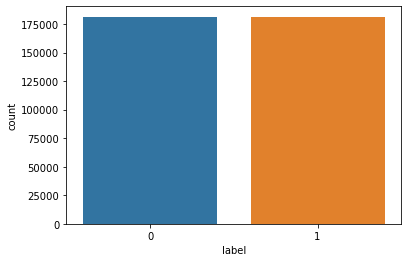

In [69]:
# Visualizing the data after oversampling
sns.countplot(y)

We have balanced the data using SMOTE.

# Best Random State

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [71]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.7731294735971627  on Random State : 86


In [72]:
# Dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=86)

In [73]:
x_train.shape

(253943, 27)

In [74]:
y_train.shape

(253943,)

In [75]:
x_test.shape

(108833, 27)

In [76]:
y_test.shape

(108833,)

In [77]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.7716317661003556
[[42798 11628]
 [13226 41181]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     54426
           1       0.78      0.76      0.77     54407

    accuracy                           0.77    108833
   macro avg       0.77      0.77      0.77    108833
weighted avg       0.77      0.77      0.77    108833



# Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.7142410849650381
[[51595  2831]
 [28269 26138]]
              precision    recall  f1-score   support

           0       0.65      0.95      0.77     54426
           1       0.90      0.48      0.63     54407

    accuracy                           0.71    108833
   macro avg       0.77      0.71      0.70    108833
weighted avg       0.77      0.71      0.70    108833



# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8403333547729089
[[53710   716]
 [16661 37746]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     54426
           1       0.98      0.69      0.81     54407

    accuracy                           0.84    108833
   macro avg       0.87      0.84      0.84    108833
weighted avg       0.87      0.84      0.84    108833



# Extra Trees Classifier

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc.score(x_train,y_train)

pred_etc=etc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_etc))
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

accuracy score:  0.9560335559986401
[[53173  1253]
 [ 3532 50875]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     54426
           1       0.98      0.94      0.96     54407

    accuracy                           0.96    108833
   macro avg       0.96      0.96      0.96    108833
weighted avg       0.96      0.96      0.96    108833



# Bagging Classifier

In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
bgc=BaggingClassifier()
bgc.fit(x_train,y_train)
bgc.score(x_train,y_train)
pred_bgc=bgc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_bgc))
print(confusion_matrix(y_test,pred_bgc))
print(classification_report(y_test,pred_bgc))

accuracy score:  0.7338215430981412
[[53704   722]
 [28247 26160]]
              precision    recall  f1-score   support

           0       0.66      0.99      0.79     54426
           1       0.97      0.48      0.64     54407

    accuracy                           0.73    108833
   macro avg       0.81      0.73      0.72    108833
weighted avg       0.81      0.73      0.72    108833



# XGBoost Classifier

In [88]:
from xgboost import XGBClassifier

In [89]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

accuracy score:  0.6561337094447456
[[54404    22]
 [37402 17005]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74     54426
           1       1.00      0.31      0.48     54407

    accuracy                           0.66    108833
   macro avg       0.80      0.66      0.61    108833
weighted avg       0.80      0.66      0.61    108833



From the above Classification Models, the highest accuracy score belongs to Extra Trees Classifier. Next, the Random Forest Classifier, followed by Logistic Regression Model & Bagging Classifier.

Next, the Decision Tree Classifier & lastly, the XGBoost Classifier.

# Cross Validation Score

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7716056294414708


In [92]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.9099694492748741


In [93]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.949641298483758


In [94]:
scr_etc=cross_val_score(etc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etc.mean())

Cross validation score of this model is:  0.9630157736167868


In [95]:
scr_bgc=cross_val_score(bgc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_bgc.mean())

Cross validation score of this model is:  0.9361481208962426


In [96]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.9367520245965893


The highest cross validation score belongs to the Extra Trees Classifier, followed by the Random Forest Classifier. Next the XGBoost Classifier and the Bagging Classifier.

Next the Decision Tree Classifier & lastly, the lowest Cross Validation Score belongs to the Logistic Regression Model.

# Hyper Parameter Tuning

Since the Accuracy score and the cross validation score of the Extra Trees Classifier are the highest we shall consider it for hyper parameter tuning.

We shall use GridSearchCV for Hyper Parameter Tuning.

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 1000],
              'max_depth' : [10, 20],
              'n_estimators' : [100, 200]}
grid_etc=GridSearchCV(etc, param_grid = parameters, cv = 10)

In [99]:
grid_etc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'n_estimators': [100, 200],
                         'random_state': [10, 1000]})

In [100]:
grid_etc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'random_state': 1000}

In [101]:
etc1=ExtraTreesClassifier(criterion='gini',random_state=1000,max_depth=20,n_estimators=200)

etc1.fit(x_train,y_train)
pred=etc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:  0.91588029366093
[[51254  3172]
 [ 5983 48424]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     54426
           1       0.94      0.89      0.91     54407

    accuracy                           0.92    108833
   macro avg       0.92      0.92      0.92    108833
weighted avg       0.92      0.92      0.92    108833



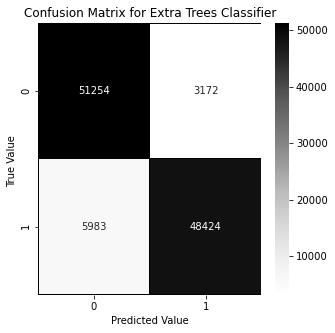

In [102]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",fmt=".0f",ax=ax,cmap="Greys",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.show()

# ROC-AUC Curve

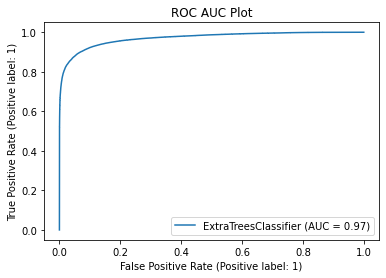

In [103]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(etc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

We have plotted the ROC-AUC curve, AUC score is 97 %.

# Saving Model

In [104]:
import joblib
joblib.dump(etc1,"Micro_Credit_Defaulter.pkl")

['Micro_Credit_Defaulter.pkl']

# Prediction

In [105]:
# Loading the saved model
Defaulter_model=joblib.load("Micro_Credit_Defaulter.pkl")

# Prediction
prediction = Defaulter_model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [106]:
pd.DataFrame([Defaulter_model.predict(x_test)[:],y_test[:]],index=["Predicted Value","Actual Value"])

,0,1,2,3,4,5,6,7,8,9,...,108823,108824,108825,108826,108827,108828,108829,108830,108831,108832
Predicted Value,0,1,1,1,1,1,1,0,0,1,...,1,0,1,0,0,0,1,1,1,0
Actual Value,0,1,1,1,1,1,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
